# 3강. 비지도 학습(군집화)

이번 시간에는 **비지도 학습** 방법론에 대해 공부했습니다. 이번 실습에서는 Pandas를 활용해 수집된 결과물을 전처리하고 비지도 학습 방법론 중 하나인 **데이터 군집화**를 해보도록 하겠습니다.<br>
이번에 활용할 데이터는 **포켓몬 게임 데이터**입니다. 웹 상에 있는 정보를 수집해서 **포켓몬별 능력치와 성향에 따라 군집**을 만들어보도록 하겠습니다.

기본적으로 모델링 이전에 어떤 방향으로 **탐색적 데이터 분석(EDA; Exploratory Data Analysis)**을 거칩니다. 수치만으로 파악하기 어려운 데이터의 분포를 시각화하여 살펴보고, 이를 통해 얻은 인사이트를 기반으로 분석을 세워나가는 것입니다.


**학습 목표**
1. Pandas를 이용한 데이터프레임 핸들링
2. Matplotlib과 Seaborn을 이용한 데이터 시각화
3. Scikit-learn을 활용한 군집화(Clustering)

In [1]:
# 한글 폰트 설치
# 이 셀을 실행시키고 '런타임 > 세션 다시 시작'을 해주세요


#!sudo apt-get install -y fonts-nanum

#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

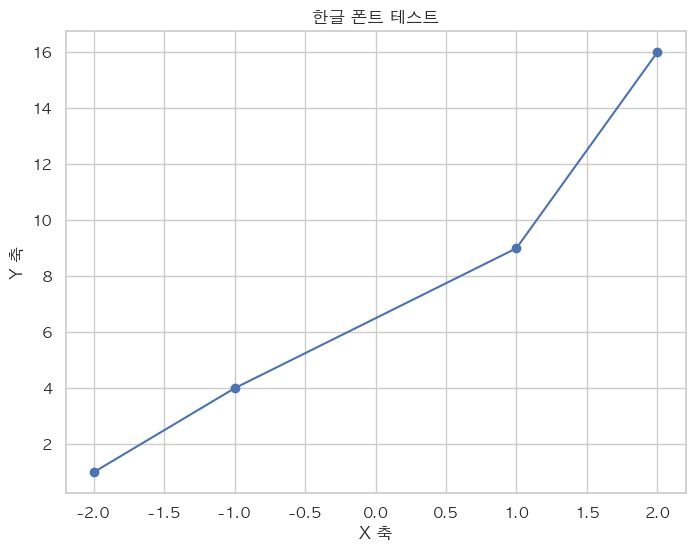

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
sns.set_theme(font ='AppleGothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')

# 샘플 플롯 생성
plt.figure(figsize=(8, 6))
plt.plot([-2, -1, 1, 2], [1, 4, 9, 16], marker='o')
plt.title('한글 폰트 테스트')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.grid(True)

# 플롯 표시
plt.show()

## Pandas 주요 함수 및 메소드

이번 실습은 **포켓몬 도감**에서 능력치를 가져와 비지도 학습으로 **군집화**하는 것이 목표입니다.<br>
이번에는 `requests`를 활용해 표를 가지고 오고, Pandas를 이용해 쉽게 처리하는 방법을 설명드리겠습니다.<br>

1. 영문 포켓몬 도감 가지고 오기
2. 한글 포켓몬 도감 가지고 오기
3. 영문 - 한글 포켓몬 도감 병합하기

이번 분석 과제에서 활용되는 **Pandas 주요 함수**를 살펴보겠습니다.

**데이터프레임 생성 예제**
```python
import pandas as pd

# 데이터프레임 생성 예제
data = {
    'Column1': ['A', 'B', 'C', 'D', 'A'],
    'Column2': [1, 2, 3, 4, 1],
    'Column3': [10, 20, 30, 40, 10]
}
df = pd.DataFrame(data)
```

**결측값 제거** `df.dropna()`

**결측값 채우기**
```python
df.fillna(0)  # 0으로 채우기
df.fillna(method='ffill')  # 이전 값으로 채우기
df.fillna(method='bfill')  # 다음 값으로 채우기
```


**loc를 사용한 데이터 선택**
```python
# 인덱스 이름을 사용하여 행과 열 선택
df.loc[0, 'Column1']  # 첫 번째 행의 'Column1' 값
df.loc[:, ['Column1', 'Column3']]  # 모든 행의 'Column1'과 'Column3' 열 선택
df.loc[df['Column2'] > 2, :]  # 조건에 맞는 행의 모든 열 선택
```

**iloc를 사용한 데이터 선택**
```python
# 정수 위치를 사용하여 행과 열 선택
df.iloc[0, 0]  # 첫 번째 행의 첫 번째 열 값
df.iloc[:, [0, 2]]  # 모든 행의 첫 번째와 세 번째 열 선택
df.iloc[1:3, :]  # 두 번째부터 세 번째 행의 모든 열 선택
```
**중복값 제거** `df.drop_duplicates()`

**중복값 확인** `df.duplicated()`

**중복값을 가진 행 선택** `df[df.duplicated()]`

**행 삭제** `df.drop(index=1)`

**열 삭제** `df.drop(columns='Column1')`

**새로운 열 추가** `df['NewColumn'] = df['Column2'] + df['Column3']`

**기존 열 수정** `df['Column2'] = df['Column2'] * 2`

**단일 열 선택** `df['Column1']`

**여러 열 선택** `df[['Column1', 'Column3']]`

**조건에 맞는 데이터 선택** `df[df['Column2'] > 2]`

**데이터 정렬**
```python
df.sort_values(by='Column3')  # 오름차순 정렬
df.sort_values(by='Column3', ascending=False)  # 내림차순 정렬
```

**병합**
```python
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['A', 'B', 'D'], 'value2': [4, 5, 6]})
merged_df = pd.merge(df1, df2, on='key', how='inner')  # inner join
merged_df = pd.merge(df1, df2, on='key', how='outer')  # outer join
merged_df = pd.merge(df1, df2, on='key', how='left')  # left join
merged_df = pd.merge(df1, df2, on='key', how='right')  # right join
```

**그룹별 합계** `df.groupby('Column1').sum()`

**그룹별 평균** `df.groupby('Column1').mean()`

**그룹별 다양한 통계량** `df.groupby('Column1').agg(['mean', 'sum', 'count'])`

**데이터프레임 요약 정보** `df.info()`

**기초 통계량 요약** `df.describe()`

**피벗 테이블 생성** `df.pivot(index='Column1', columns='Column2', values='Column3')`

**열 이름 변경** `df.rename(columns={'Column1': 'NewColumnName'})`

**깊은 복사** `df_copy = df.copy()`

**데이터프레임 행 방향으로 합치기** `df_append = df.append(df2, ignore_index=True)` (참고: 지금은 concat 활용을 권장합니다.)

**데이터프레임 열 방향으로 합치기** `df_concat = pd.concat([df1, df2], axis=1)`

In [3]:
# 필요한 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [4]:
def get_soup(url):
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html, 'html.parser')
    
    return soup

In [5]:
# BeautifulSoup으로 영문 포켓몬 도감 수집
url = 'https://pokemondb.net/pokedex/all'
soup = get_soup(url)

In [6]:
# 표 태그 찾기
# HTML 테이블은 <table> 태그로 시작하고, 여러 개의 행(row)은 <tr> 태그로, 각 행의 데이터는 <td> 태그로 정의
html_table = soup.find('table')

In [7]:
# 표를 데이터 프레임으로 바로 가지고 오기
from io import StringIO

# soup형식이기 때문에 문자열 데이터로 변경
html_table_str = str(html_table)
html_table_io = StringIO(html_table_str)

en_df = pd.read_html(html_table_io)[0]



In [8]:
en_df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1210,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98
1211,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60
1212,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85
1213,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85


In [9]:
# 한글 포켓몬 도감 수집
url = 'https://pokemon.fandom.com/ko/wiki/%EC%A0%84%EA%B5%AD%EB%8F%84%EA%B0%90'
soup = get_soup(url)

In [10]:
# 한글 포켓몬 도감 데이터 프레임 생성
kr_df = pd.DataFrame()
for html_table in soup.find_all('table')[:-1]:
    kr_df_part = pd.read_html(StringIO(str(html_table)))[0]
    kr_df_part['지방'] = [re.sub('도감', '지방', kr_df_part.columns[0])]*len(kr_df_part)
    kr_df = pd.concat([kr_df, kr_df_part])

## 데이터 전처리

In [11]:
# 한글 포켓몬 도감 확인
kr_df

# 여기에서 어떤 데이터를 가지고 와야 할지 봅시다.

,관동도감,전국도감,아이콘,포켓몬,타입,타입.1,지방,성도도감,호연도감,신오도감,하나도감,센트럴/코스트/마운틴 칼로스도감,알로라도감,가라르도감,히스이도감,팔데아도감
0,#001,#0001,NaN,이상해씨,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#002,#0002,NaN,이상해풀,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#003,#0003,NaN,이상해꽃,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,#0003,NaN,메가이상해꽃,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#004,#0004,NaN,파이리,불꽃,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,#1021,NaN,날뛰는우레,전기드래곤,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#237블루베리
120,NaN,#1022,NaN,무쇠암석,바위에스퍼,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#239블루베리
121,NaN,#1023,NaN,무쇠감투,강철에스퍼,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#238블루베리
122,NaN,#1024,NaN,테라파고스,노말,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#240블루베리


### 컬럼 추출 | 중복값 제거 | 데이터 병합

In [12]:
# loc를 이용하여 특정 컬럼(또는 로우)를 추출하는 방법
kr_df.loc[:, ['전국도감', '포켓몬', '지방']]

,전국도감,포켓몬,지방
0,#0001,이상해씨,관동지방
1,#0002,이상해풀,관동지방
2,#0003,이상해꽃,관동지방
3,#0003,메가이상해꽃,관동지방
4,#0004,파이리,관동지방
...,...,...,...
119,#1021,날뛰는우레,팔데아지방
120,#1022,무쇠암석,팔데아지방
121,#1023,무쇠감투,팔데아지방
122,#1024,테라파고스,팔데아지방


In [13]:
kr_df = kr_df[
    ['전국도감', '포켓몬', '지방']
].copy(); kr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 0 to 123
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전국도감    1187 non-null   object
 1   포켓몬     1187 non-null   object
 2   지방      1187 non-null   object
dtypes: object(3)
memory usage: 37.1+ KB


In [14]:
# 리스트 인덱싱을 통해 특정 컬럼만 추출하는 방법
# kr_df.iloc[:,:]
kr_df.iloc[:5, :3]

,전국도감,포켓몬,지방
0,#0001,이상해씨,관동지방
1,#0002,이상해풀,관동지방
2,#0003,이상해꽃,관동지방
3,#0003,메가이상해꽃,관동지방
4,#0004,파이리,관동지방


In [15]:
print(kr_df.columns)

Index(['전국도감', '포켓몬', '지방'], dtype='object')


In [16]:
# 병합을 위해 전국 도감 텍스트 전처리
kr_df['전국도감'] = kr_df['전국도감'].map(lambda x : int(re.sub('#', '', x)))

# 샾을 찾아서 없앤다(x에서 찾아서 대체)

In [17]:
# 중복값 확인 및 제거
kr_df.drop_duplicates(subset=['전국도감'])

,전국도감,포켓몬,지방
0,1,이상해씨,관동지방
1,2,이상해풀,관동지방
2,3,이상해꽃,관동지방
4,4,파이리,관동지방
5,5,리자드,관동지방
...,...,...,...
119,1021,날뛰는우레,팔데아지방
120,1022,무쇠암석,팔데아지방
121,1023,무쇠감투,팔데아지방
122,1024,테라파고스,팔데아지방


In [18]:
# 컬럼명 변경
kr_df.columns = ['#', 'Name', 'Region']; kr_df

,#,Name,Region
0,1,이상해씨,관동지방
1,2,이상해풀,관동지방
2,3,이상해꽃,관동지방
3,3,메가이상해꽃,관동지방
4,4,파이리,관동지방
...,...,...,...
119,1021,날뛰는우레,팔데아지방
120,1022,무쇠암석,팔데아지방
121,1023,무쇠감투,팔데아지방
122,1024,테라파고스,팔데아지방


In [19]:
# 데이터 병합
df = pd.merge(en_df, kr_df, on='#', suffixes=['_EN', '']);df

,#,Name_EN,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Name,Region
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,이상해씨,관동지방
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,이상해풀,관동지방
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,이상해꽃,관동지방
3,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,메가이상해꽃,관동지방
4,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,이상해꽃,관동지방
...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98,무쇠감투,팔데아지방
1612,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60,테라파고스,팔데아지방
1613,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85,테라파고스,팔데아지방
1614,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85,테라파고스,팔데아지방


## 컬럼 연산

In [20]:
# 타입 분리하기
type_ = df['Type'].str.split()

In [21]:
# 타입 컬럼 추가
df['Type_1'] = type_.str[0]
df['Type_2'] = type_.str[1]

In [22]:
# 컬럼 연산
# 파생 변수
df['Physical'] = df['Attack'] + df['Defense']

In [23]:
df['Special'] = df['Sp. Atk'] + df['Sp. Def']

In [24]:
# .apply를 활용한 컬럼 연산
df.apply(lambda x: x['Attack'] + x['Defense'], axis = 1)

0        98
1       125
2       165
3       165
4       223
       ... 
1611    172
1612    150
1613    205
1614    215
1615    248
Length: 1616, dtype: int64

In [25]:
df

,#,Name_EN,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Name,Region,Type_1,Type_2,Physical,Special
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,이상해씨,관동지방,Grass,Poison,98,130
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,이상해풀,관동지방,Grass,Poison,125,160
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,이상해꽃,관동지방,Grass,Poison,165,200
3,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,메가이상해꽃,관동지방,Grass,Poison,165,200
4,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,이상해꽃,관동지방,Grass,Poison,223,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98,무쇠감투,팔데아지방,Steel,Psychic,172,230
1612,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60,테라파고스,팔데아지방,Normal,NaN,150,150
1613,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85,테라파고스,팔데아지방,Normal,NaN,205,215
1614,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85,테라파고스,팔데아지방,Normal,NaN,215,240


## 데이터 시각화
이제 Matplotlib과 Seaborn을 활용한 데이터 시각화를 해보도록 하겠습니다.<br>
보통은 Matplotlib을 활용해서 시각화를 하는 경우가 많은데 Pandas 데이터프레임을 활용하는 경우 Seaborn을 쓰는 게 편합니다.<br>
그런데 사실 Seaborn은 Matplotlib 위에서 동작하기 때문에 둘 다 알아두시면 좋아요.

In [26]:
# 기본적으로 필요한 라이브러리를 불러오기
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# 시각화 설정

# Seaborn에서 기본 스타일을 지정할 수 있습니다.
sns.set_theme(font ='AppleGothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')

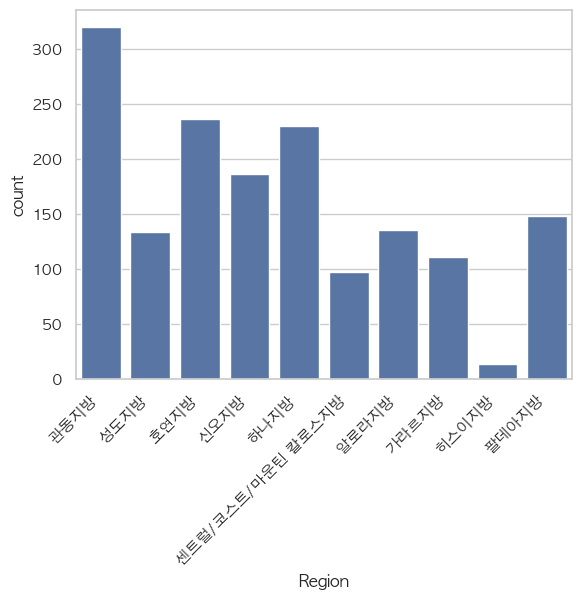

In [28]:
# Countplot | 지방별 포켓몬 수 시각화
plt.figure(dpi= 100)
plt.xticks(rotation=45, ha='right')
sns.countplot(x='Region', data = df)
plt.show()

In [29]:
# 고윳값 추출
# 타입별 카운트를 알아보기 위해 고윳값을 추출합니다.

type_list = list(df['Type_1'].unique())
print(type_list)

['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying']


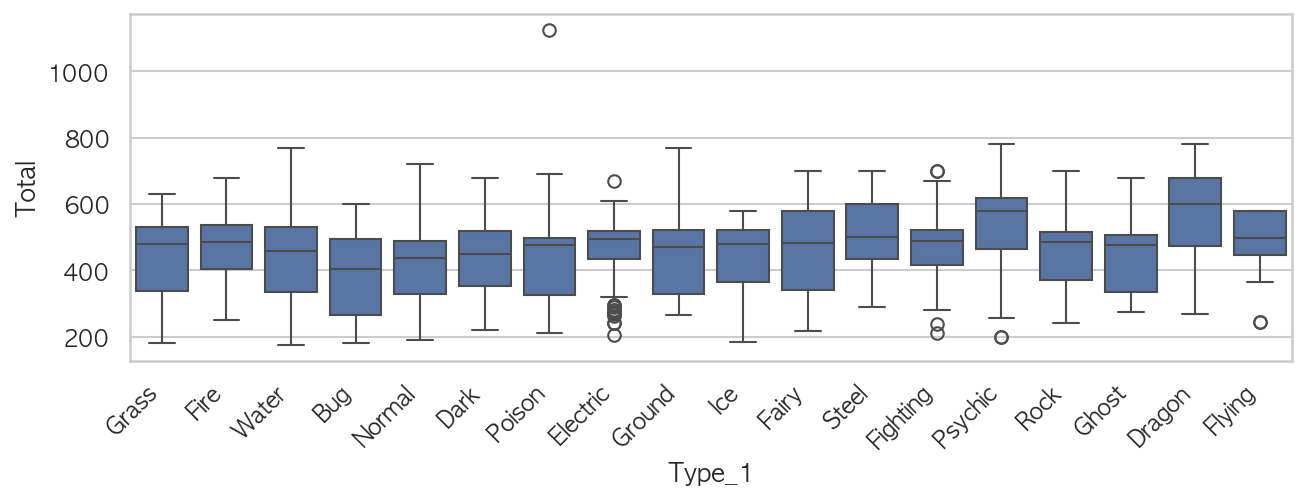

In [30]:
# Boxplot | 타입_1별 포켓몬 능력치
plt.figure(figsize = (10,3), dpi=150) # 여기에서 출력 사이즈를 지정합니다.
plt.xticks(rotation=45, ha = 'right')
sns.boxplot(x = 'Type_1', y = 'Total', data = df)
plt.show()

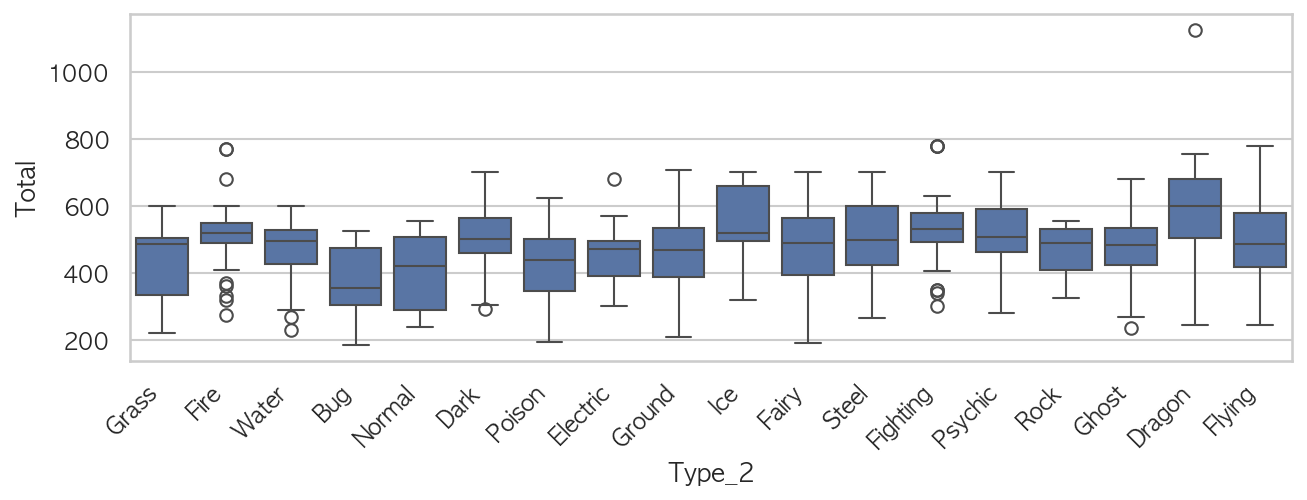

In [31]:
# Boxplot | 타입_2별 포켓몬 능력치
plt.figure(figsize = (10,3), dpi=150) # 여기에서 출력 사이즈를 지정합니다.
plt.xticks(rotation=45, ha = 'right')
sns.boxplot(x = 'Type_2', y = 'Total', data = df, order=type_list)
plt.show()

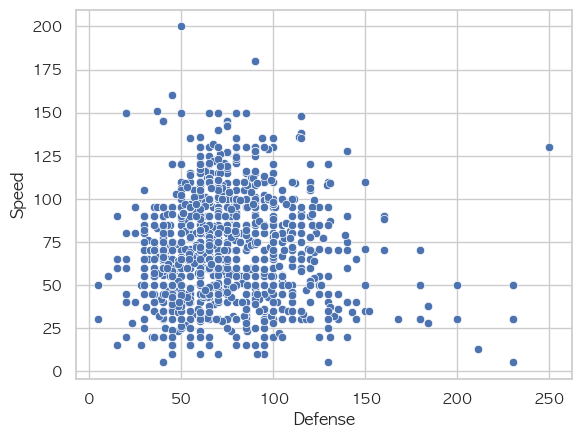

In [32]:
# Scatterplot | 두 개의 연속형 데이터의 분포
plt.figure(dpi=100)
sns.scatterplot(x='Defense', y='Speed', data=df)
plt.show()

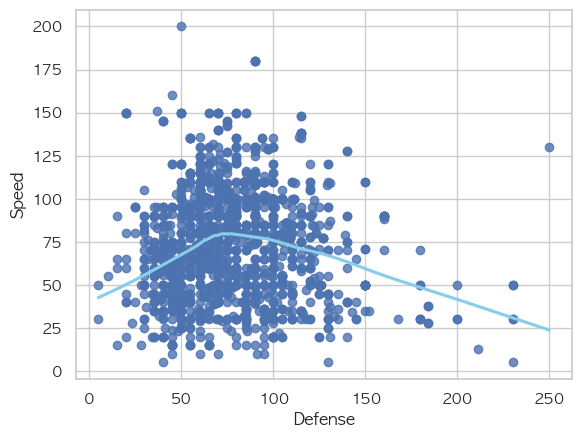

In [33]:
# Regplot | Scatterplot + Regression Line
plt.figure(dpi=100)
sns.regplot(x='Defense', y='Speed', lowess=True, data=df, line_kws={'color' : 'skyblue'})
plt.show()

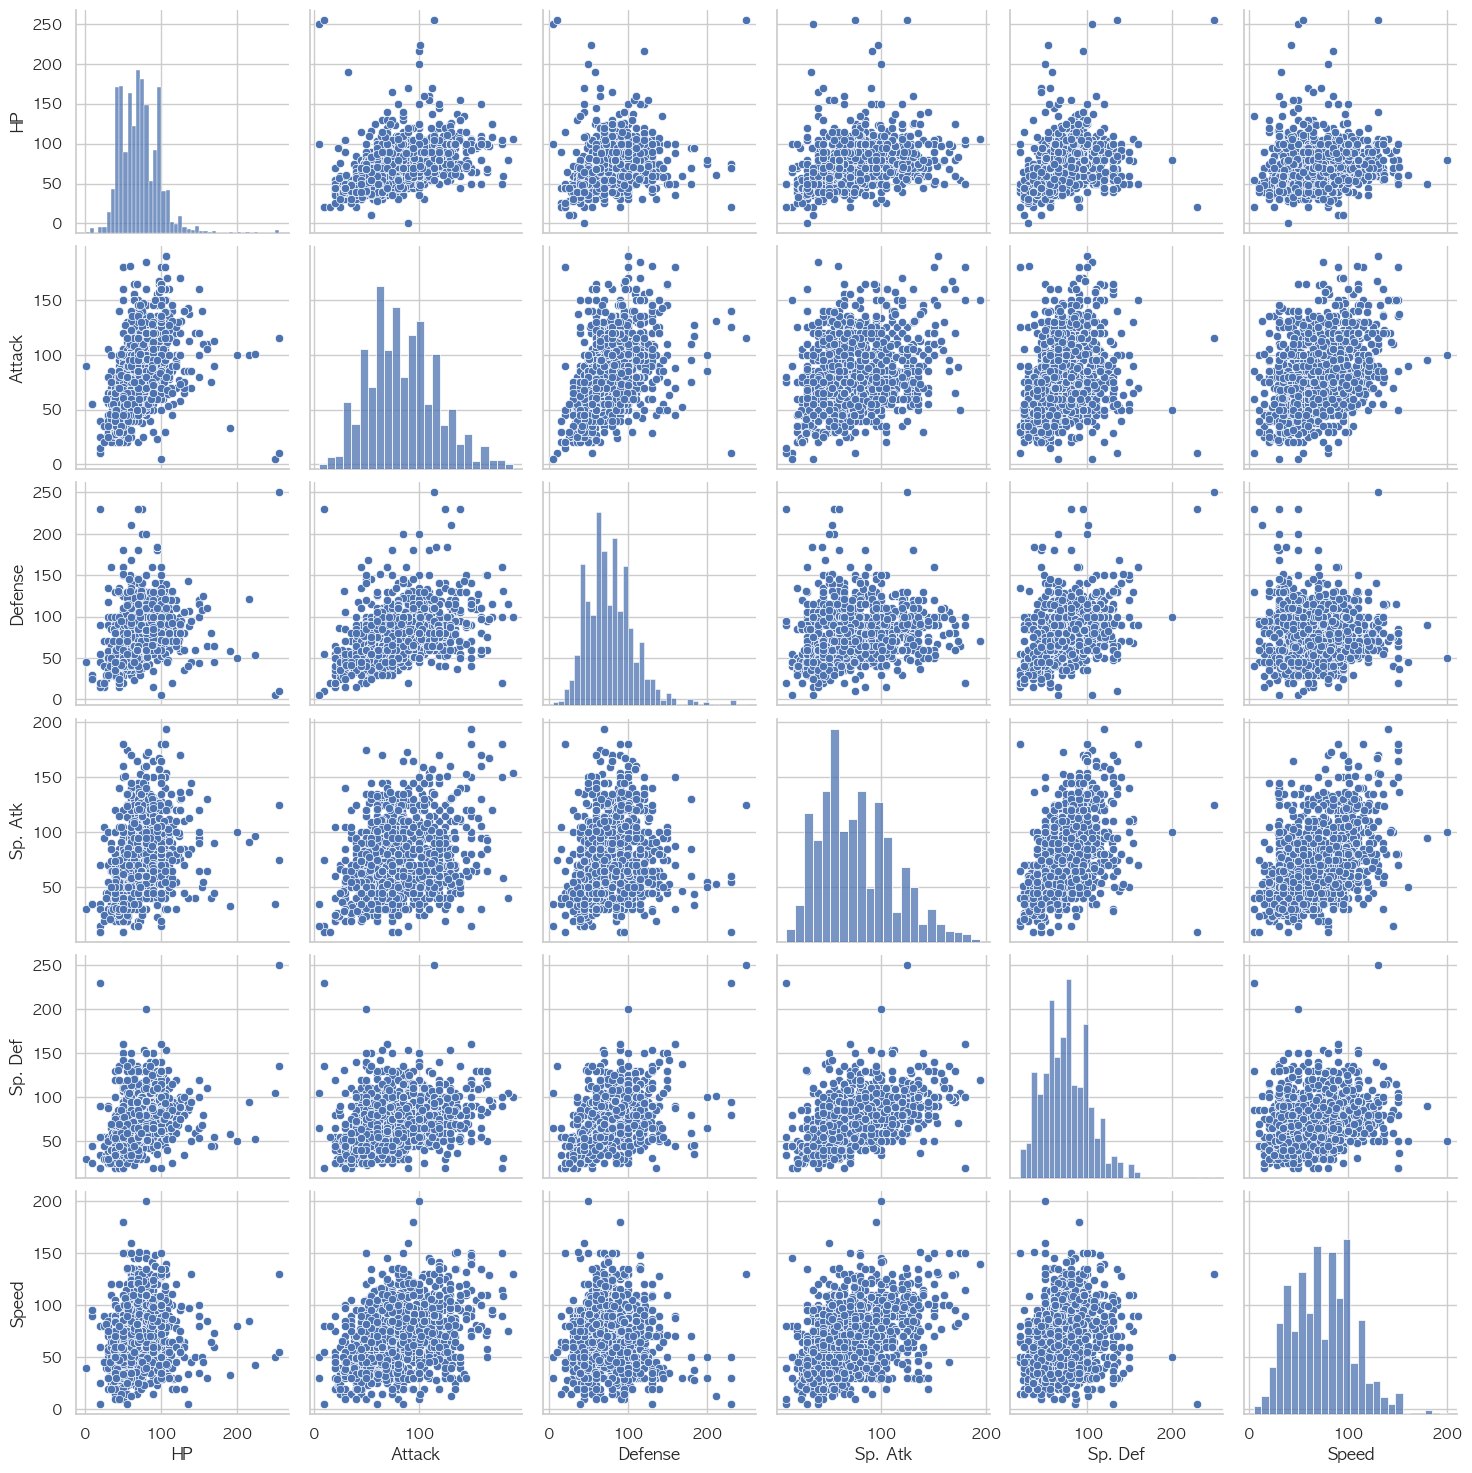

In [34]:
# Pairplot | 모든 연속형 데이터의 Scatterplot과 히스토그램을 보고 싶을 때
sns.pairplot(df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
plt.show()

In [35]:
# 인덱스를 활용한 컬럼(또는 로우) 추출
df.iloc[:, 4:9]

,HP,Attack,Defense,Sp. Atk,Sp. Def
0,45,49,49,65,65
1,60,62,63,80,80
2,80,82,83,100,100
3,80,82,83,100,100
4,80,100,123,122,120
...,...,...,...,...,...
1611,90,72,100,122,108
1612,90,65,85,65,85
1613,95,95,110,105,110
1614,160,105,110,130,110


## 데이터 군집화
Clustering이라고도 불리는 군집화는 대표적인 **비지도 학습 기법** 중에 하나입니다.<br>
포켓몬을 능력치에 따라 구분한다고 하더라도 어떤 기준에 따라 군집화해야 할지 모를 수 있습니다.<br> 비지도 학습은 우리가 정답을 알지 못하더라도, 통계적인 기법을 통해 군집을 나눌 수 있도록 도와줍니다.<br>
물론, 비지도 학습의 특성상 정해진 답이 없기 때문에 최적의 값을 찾기 위한 시행착오가 있을 수 있습니다.

### 차원 축소 모델 (2차원 투영)
보통 하나의 컬럼이 하나의 차원을 이룹니다.<br>
쉽게 생각해보면 X축과 Y축이 보통 우리가 생각하는 2차원인데요, 여기에 Z축이 포함된다면 3차원이라고 부르지요. 이처럼 하나의 축이 차원이라고 보시면 됩니다.<br>
하지만 군집화를 위해서는 우선 2차원 평면으로 **투영(Projection)**해야 합니다. 정보의 손실을 최소화하면서 2차원 값을 추출하는 방법으로는 PCA와 t-SNE가 있습니다. 자세한 설명은 생략하고 오늘은 코드만 구현해보겠습니다.

In [36]:
df.iloc[:, 4:10]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,82,83,100,100,80
4,80,100,123,122,120,80
...,...,...,...,...,...,...
1611,90,72,100,122,108,98
1612,90,65,85,65,85,60
1613,95,95,110,105,110,85
1614,160,105,110,130,110,85


In [37]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
result_pca = pca.fit_transform(df.iloc[:,4:10])
df[['X', 'Y']] = result_pca

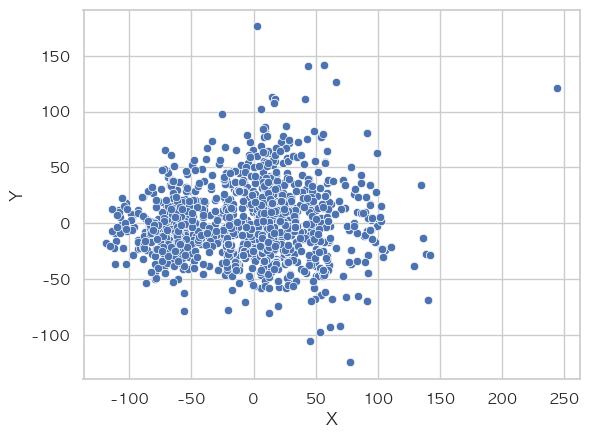

In [38]:
# PCA 차원 축소 결과
sns.scatterplot(x='X', y='Y', data=df)
plt.show()

In [39]:
tsne = TSNE(n_components=2, learning_rate = 1000, random_state = 319)
result_tsne = tsne.fit_transform(df.iloc[:,4:10])
df[['X', 'Y']] = result_tsne

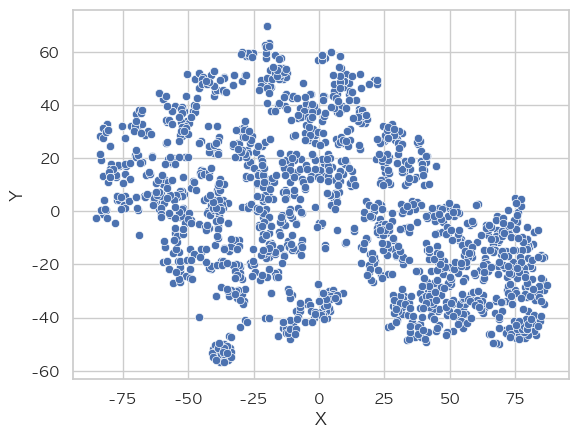

In [40]:
# t-SNE 차원 축소 결과
sns.scatterplot(x='X', y='Y', data=df)
plt.show()

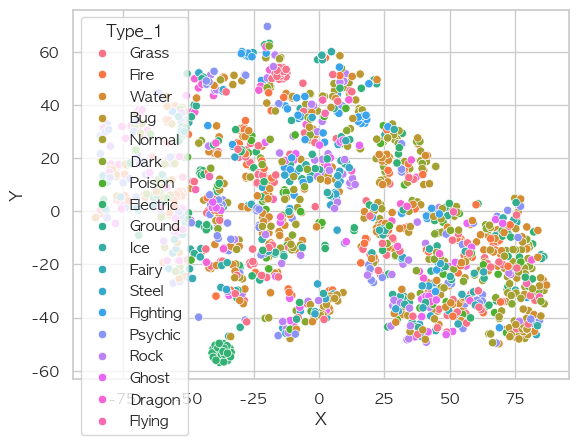

In [41]:
# 포켓몬 타입과 군집의 상관 관계가 있을까?
sns.scatterplot(x='X', y='Y', data=df, hue='Type_1')
plt.show()

### 데이터 군집화 모델

In [42]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [43]:
# DBSCAN 모델
cluster = DBSCAN(eps=3)
label = cluster.fit_predict(df[['X', 'Y']])
df['Cluster_DB'] = label

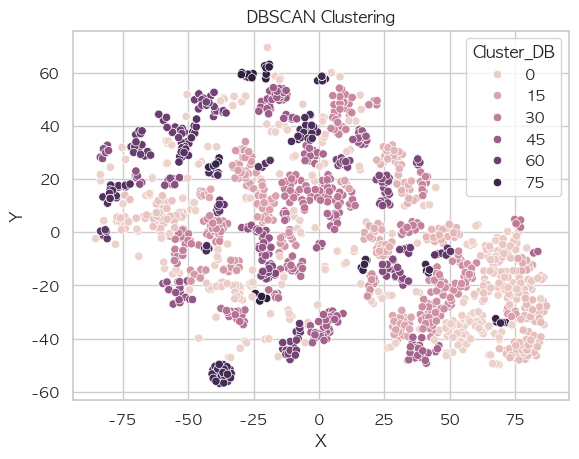

In [44]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'Cluster_DB', data = df)
plt.title('DBSCAN Clustering')
plt.show()

In [45]:
# KMeans 모델
kmeans = KMeans(n_clusters=8, random_state=319, n_init='auto')
label = kmeans.fit_predict(df[['X', 'Y']])
df['Cluster_KM'] = label

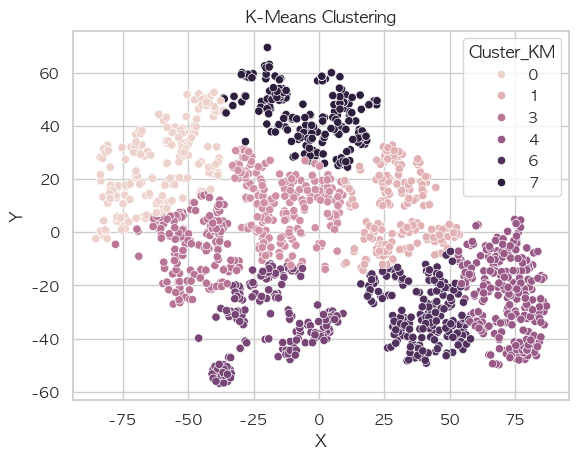

In [46]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'Cluster_KM', data = df)
plt.title('K-Means Clustering')
plt.show()

In [47]:
# 클러스터에 어떤 포켓몬이 포함되어 있을까?
cluster = 2
df[df['Cluster'] == cluster][['Name', 'Total']]

KeyError: 'Cluster'

# [복습 과제 1] 최적 모델과 하이퍼 파라미터 찾기
위의 코드를 활용해 DBSCAN과 K-Means의 하이퍼 파라미터를 조정하며 최적의 군집을 나타내는 모델과 그때의 하이퍼 파라미터를 찾습니다. 두 모델의 특징을 비교하며 더 나아가 최적이라고 판단한 이유를 작성해주시면 됩니다.

그리고 최적 모델 이미지와 작성한 내용을 캡처하여 Slack 채널에 공유해주세요.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# DBSCAN 파라미터 조정
###
eps_values = [0.1, 0.2, 0.5, 1.0, 1.5, 2.0]
min_samples_values = [12, 15, 18, 21]


for eps in eps_values:
    for min_samples in min_samples_values:
        cluster_dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = cluster_dbscan.fit_predict(df[['X', 'Y']])

        if len(set(clusters_dbscan)) > 1:  # 군집이 2개 이상이어야 silhouette_score를 계산할 수 있음.
            silhouette_avg = silhouette_score(df[['X', 'Y']], clusters_dbscan)
            if silhouette_avg > best_silhouette_dbscan:
                best_silhouette_dbscan = silhouette_avg
                best_dbscan = (eps, min_samples)

print(f"Best DBSCAN - eps: {best_dbscan[0]}, min_samples: {best_dbscan[1]}, silhouette_score: {best_silhouette_dbscan}")

# 최적 DBSCAN 모델로 시각화
cluster_dbscan = DBSCAN(eps=best_dbscan[0], min_samples=best_dbscan[1])
df['Cluster_DBSCAN'] = cluster_dbscan.fit_predict(df[['X', 'Y']])

sns.scatterplot(x='X', y='Y', hue='Cluster_DBSCAN', data=df, palette='viridis')
plt.title('Best DBSCAN Clustering')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# K-Means 파라미터 조정
###

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=319, n_init='auto')
    clusters_kmeans = kmeans.fit_predict(df[['X', 'Y']])

    silhouette_avg = silhouette_score(df[['X', 'Y']], clusters_kmeans)
    if silhouette_avg > best_silhouette_kmeans:
        best_silhouette_kmeans = silhouette_avg
        best_kmeans = k

print(f"Best K-Means - n_clusters: {best_kmeans}, silhouette_score: {best_silhouette_kmeans}")

# 최적 K-Means 모델로 시각화
###

sns.scatterplot(x='X', y='Y', hue='Cluster_KMeans', data=df, palette='viridis')
plt.title('Best K-Means Clustering')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means 파라미터 조정
###

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=319, n_init='auto')
    clusters_kmeans = kmeans.fit_predict(df[['X', 'Y']])
    silhouette_avg = silhouette_score(df[['X', 'Y']], clusters_kmeans)

    if silhouette_avg > best_silhouette_kmeans:
        best_silhouette_kmeans = silhouette_avg
        best_kmeans = k

print(f"Best K-Means - n_clusters: {best_kmeans}, silhouette_score: {best_silhouette_kmeans}")


선정 모델:

하이퍼 파라미터:

모델의 특징 비교 및 군집 결과에 대한 해석(최적 판단 이유):

# [복습 과제 2] Boxplot 시각화 후 결과 해석

약간의 데이터프레임 조작을 통해, 박스플롯 시각화를 용이하게 만들었습니다.

`melted_df` 를 활용해 **능력치별 클러스터의 분포 차이**와 **클러스터별 능력치 분포 차이**를 분석해봅니다.

In [ ]:
# 추출하고자 하는 컬럼명
cols =

In [ ]:
# 추출하고자 하는 컬럼명 추가
###

In [ ]:
# 데이터 재구조화 (pd.melt)
melted_df =

In [ ]:
# 클러스터 확인
###

In [ ]:
# 클러스터별 포켓몬 수 카운트
###

In [ ]:
# 클러스터별 능력치 평균
###

In [ ]:
melted_df

In [ ]:
# 클러스터별 Total 박스플롯
plt.figure(figsize = (6, 4), dpi = 100)
###
plt.show()

In [ ]:
# 능력치 기준 클러스터 박스플롯
plt.figure(figsize = (20, 4), dpi = 100)
###

plt.legend(ncol = 8)
plt.show()

결과에 대한 해석:


In [ ]:
# 클러스터 기준 세부 능력치 박스플롯
plt.figure(figsize = (20, 3), dpi = 100)
sns.boxplot(data = melted_df, x = 'Cluster', y = 'Value', hue = 'Stats')
plt.legend(ncol = 8)
plt.show()

결과에 대한 해석:
